In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [15]:
df = pd.read_excel("/content/online_retail_II.xlsx")

df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [17]:
df.isnull().sum()


,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


In [18]:
# Remove missing values
df = df.dropna()

# Remove invalid quantities and prices
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]

df.shape


(407664, 8)

In [19]:
df['TotalSales'] = df['Quantity'] * df['Price']

df[['Quantity', 'Price', 'TotalSales']].head()


,Quantity,Price,TotalSales
0,12,6.95,83.4
1,12,6.75,81.0
2,12,6.75,81.0
3,48,2.10,100.8
4,24,1.25,30.0


In [20]:
desc_stats = df[['Quantity', 'Price', 'TotalSales']].describe()
desc_stats


,Quantity,Price,TotalSales
count,407664.000000,407664.000000,407664.000000
mean,13.585585,3.294438,21.664909
std,96.840747,34.757965,77.150058
min,1.000000,0.001000,0.001000
25%,2.000000,1.250000,4.950000
50%,5.000000,1.950000,11.900000
75%,12.000000,3.750000,19.500000
max,19152.000000,10953.500000,15818.400000


In [21]:
sales_by_country = (
    df.groupby('Country')['TotalSales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

sales_by_country


,TotalSales
Country,
United Kingdom,7414755.963
EIRE,356085.210
Netherlands,268786.000
Germany,202395.321
France,146215.420
Sweden,53171.390
Denmark,50906.850
Spain,47601.420
Switzerland,43921.390


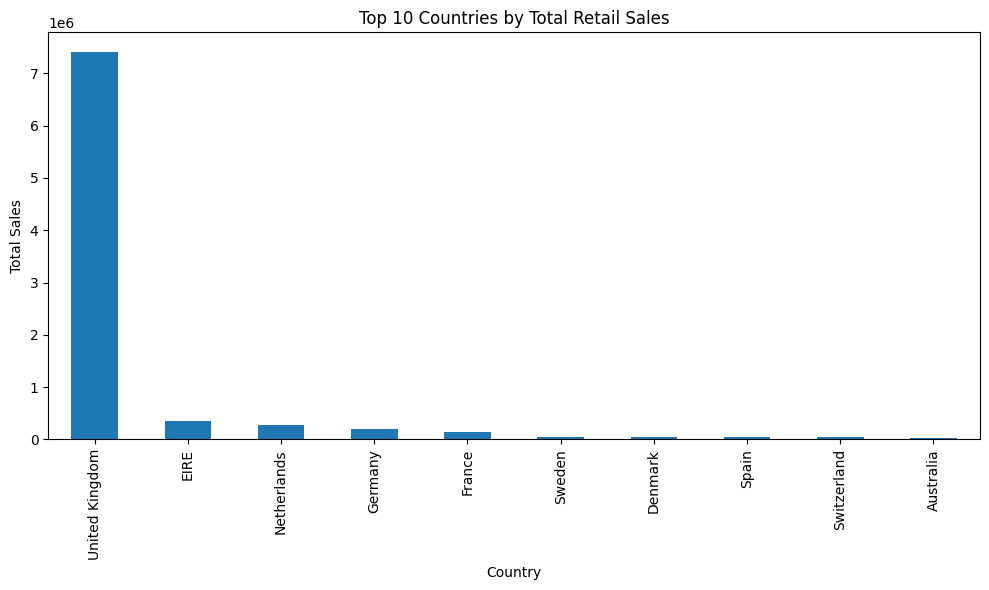

In [22]:
plt.figure(figsize=(10,6))
sales_by_country.plot(kind='bar')
plt.title("Top 10 Countries by Total Retail Sales")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.savefig("figure_5_1_sales_by_country.png")
plt.show()


In [23]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_sales = df.groupby('Month')['TotalSales'].sum()
monthly_sales.head()


,TotalSales
Month,
2009-12,686654.160
2010-01,557319.062
2010-02,506371.066
2010-03,699608.991
2010-04,594609.192


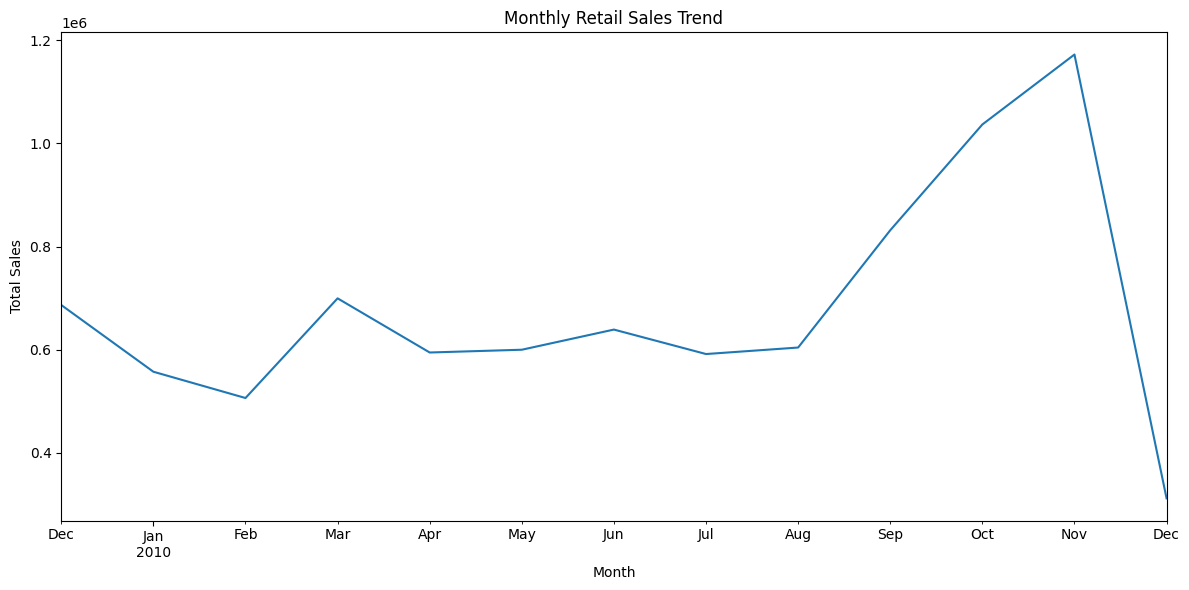

In [24]:
plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title("Monthly Retail Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.savefig("figure_5_2_monthly_sales_trend.png")
plt.show()


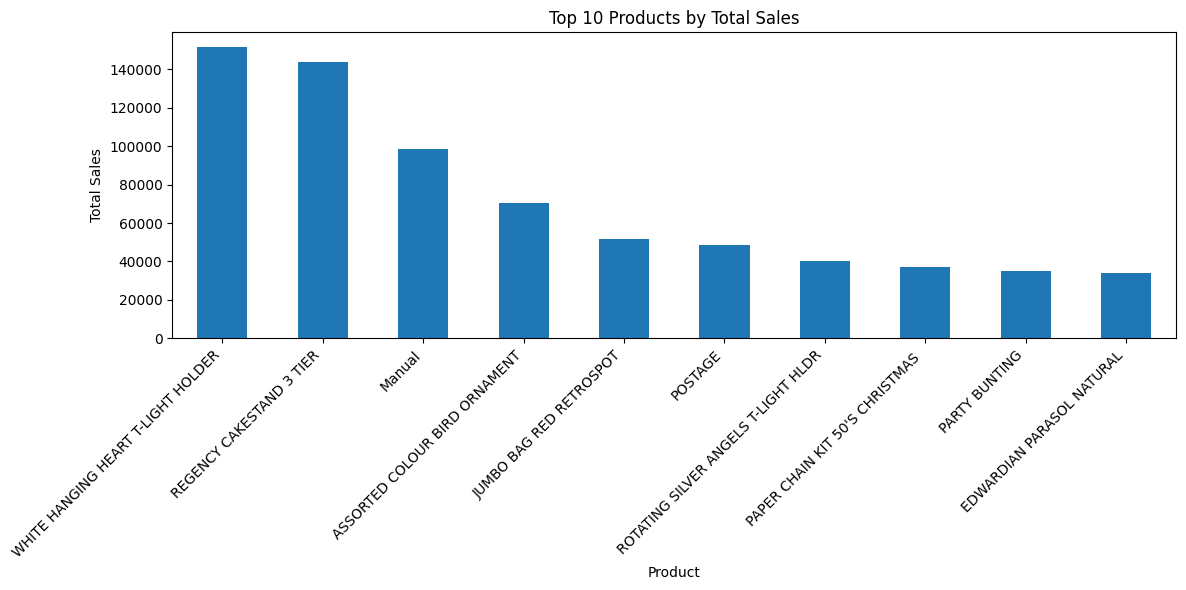

In [25]:
top_products = (
    df.groupby('Description')['TotalSales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("figure_5_3_top_products.png")
plt.show()


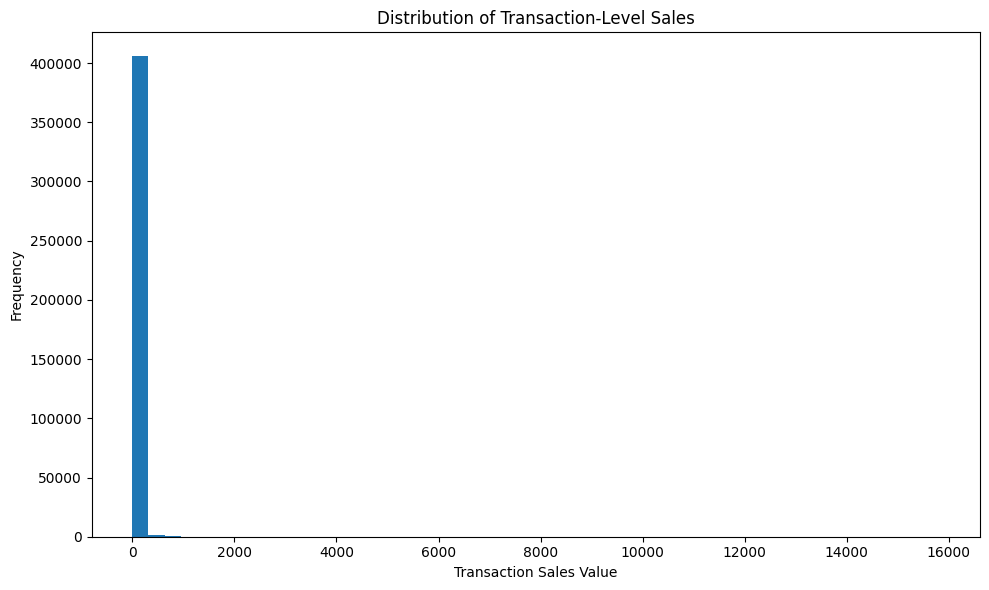

In [26]:
plt.figure(figsize=(10,6))
plt.hist(df['TotalSales'], bins=50)
plt.title("Distribution of Transaction-Level Sales")
plt.xlabel("Transaction Sales Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("figure_5_4_sales_distribution.png")
plt.show()


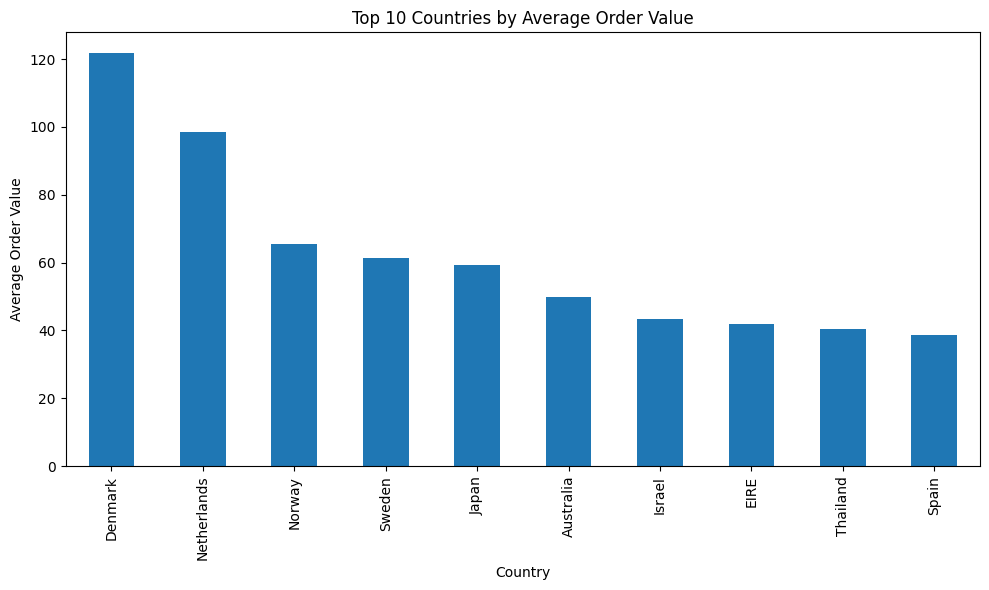

In [27]:
avg_order_country = (
    df.groupby('Country')['TotalSales']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
avg_order_country.plot(kind='bar')
plt.title("Top 10 Countries by Average Order Value")
plt.xlabel("Country")
plt.ylabel("Average Order Value")
plt.tight_layout()
plt.savefig("figure_5_5_avg_order_country.png")
plt.show()


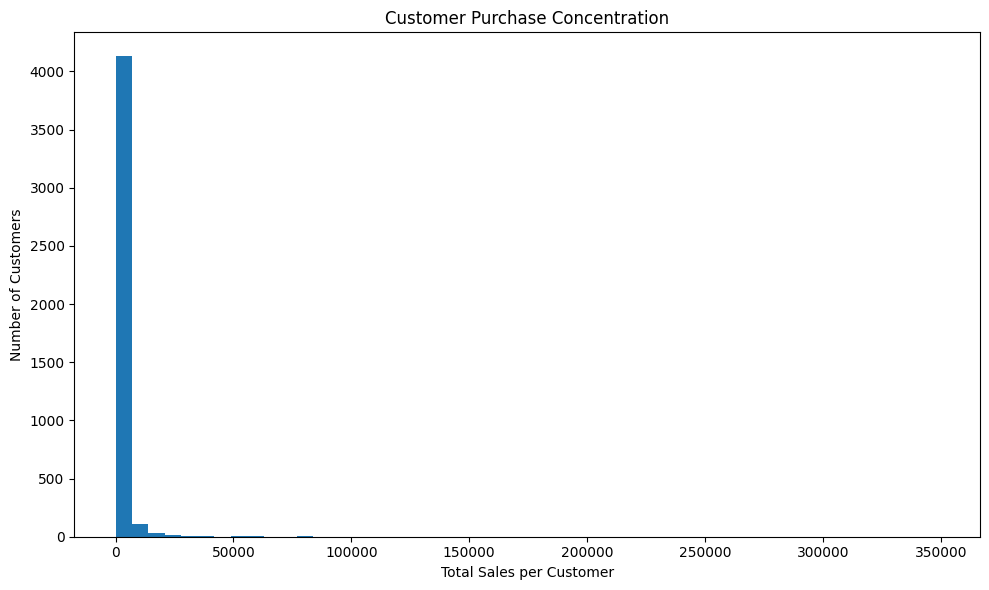

In [28]:
customer_sales = (
    df.groupby('Customer ID')['TotalSales']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
plt.hist(customer_sales, bins=50)
plt.title("Customer Purchase Concentration")
plt.xlabel("Total Sales per Customer")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.savefig("figure_5_6_customer_concentration.png")
plt.show()


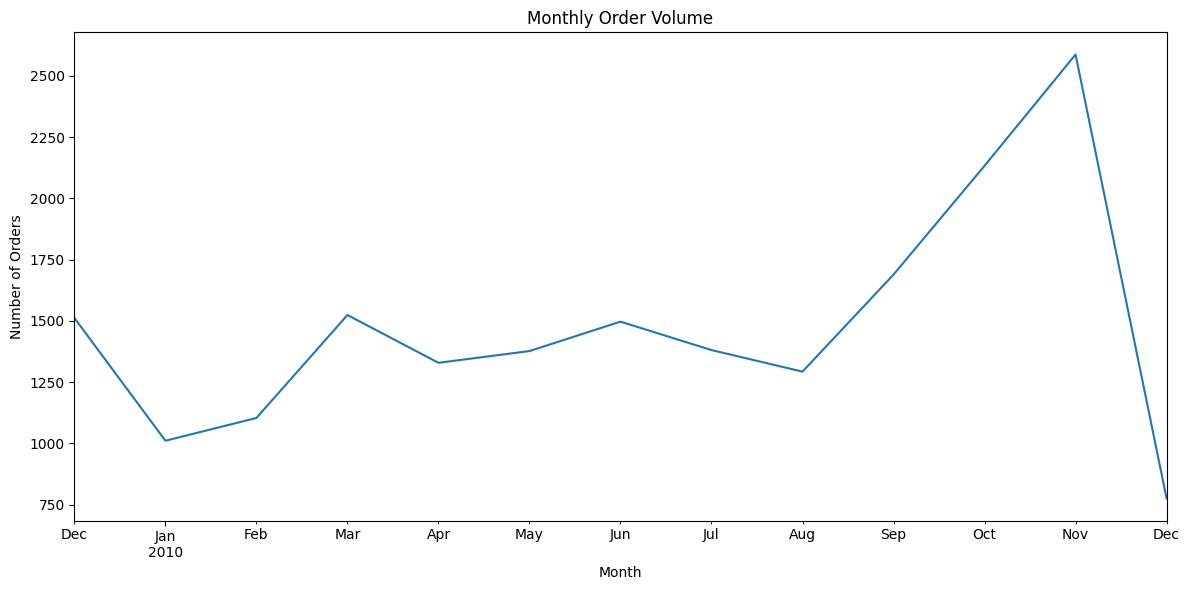

In [29]:
monthly_orders = df.groupby('Month')['Invoice'].nunique()

plt.figure(figsize=(12,6))
monthly_orders.plot()
plt.title("Monthly Order Volume")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.savefig("figure_5_7_monthly_orders.png")
plt.show()


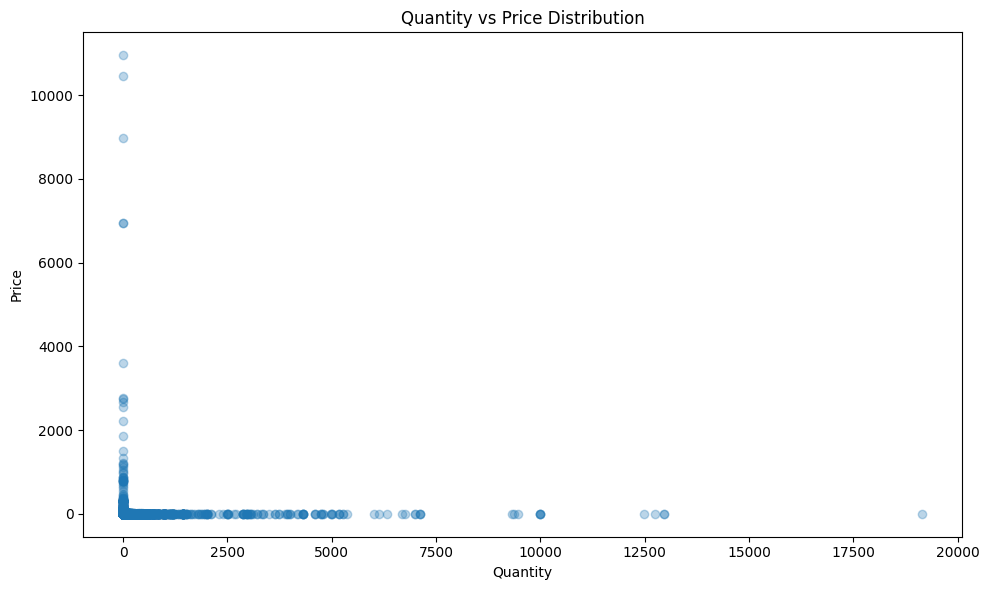

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(df['Quantity'], df['Price'], alpha=0.3)
plt.title("Quantity vs Price Distribution")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.tight_layout()
plt.savefig("figure_5_8_quantity_price.png")
plt.show()


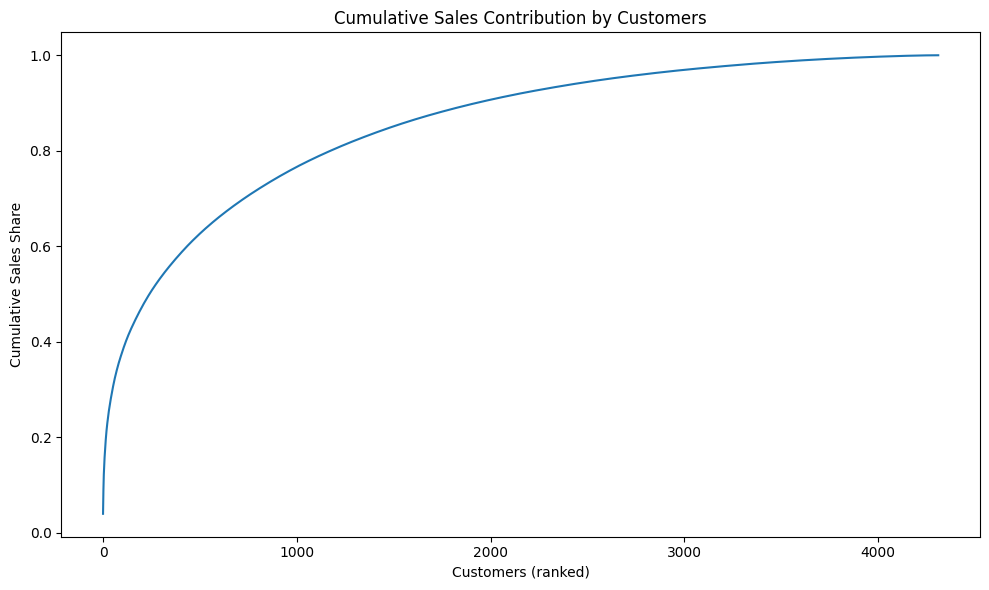

In [31]:
sorted_sales = customer_sales.sort_values(ascending=False)
cumulative_sales = sorted_sales.cumsum() / sorted_sales.sum()

plt.figure(figsize=(10,6))
plt.plot(cumulative_sales.values)
plt.title("Cumulative Sales Contribution by Customers")
plt.xlabel("Customers (ranked)")
plt.ylabel("Cumulative Sales Share")
plt.tight_layout()
plt.savefig("figure_5_9_pareto_curve.png")
plt.show()
